# **Light Gradient Boosting Machine (LightGBM) Model**

# Importing Necessary Dependencies

In [19]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# Load preprocessed data

In [20]:
# Load preprocessed data
X_train = pd.read_parquet('../data/processed/X_train.parquet')
X_test = pd.read_parquet('../data/processed/X_test.parquet')
y_train = pd.read_parquet('../data/processed/y_train.parquet').squeeze()
y_test = pd.read_parquet('../data/processed/y_test.parquet').squeeze()

# Drop the non-numeric 'code_snippet' column
X_train = X_train.drop(columns=['code_snippet'])
X_test = X_test.drop(columns=['code_snippet'])


# Ecode non-numeric labels

In [21]:
# Encode labels if they are not numeric
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Train LightGBM classifier

In [22]:
# Train LightGBM classifier
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train_enc)

LGBMClassifier(random_state=42)

# Predict


In [23]:
# Predict
y_pred = lgbm.predict(X_test)

# Evaluate

In [24]:
# Evaluate
accuracy = accuracy_score(y_test_enc, y_pred)
print(f"LightGBM Accuracy: {round(accuracy, 2)}")

LightGBM Accuracy: 0.83


# Classification report

In [25]:
# Classification report
print(classification_report(y_test_enc, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

         bad       0.84      0.85      0.84     28577
        good       0.81      0.79      0.80     23143

    accuracy                           0.83     51720
   macro avg       0.82      0.82      0.82     51720
weighted avg       0.83      0.83      0.83     51720



# Feature importance plot

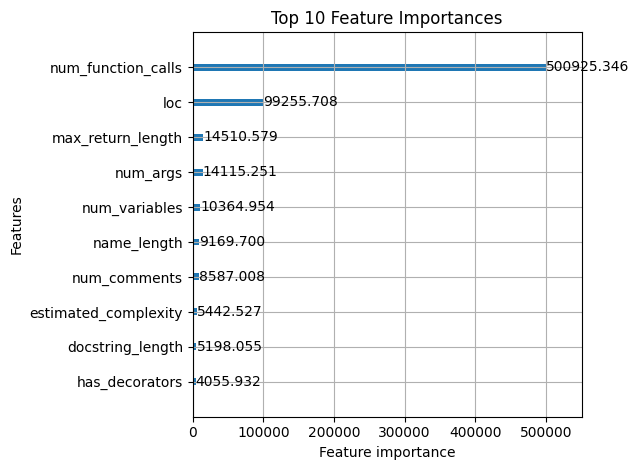

In [26]:
# Feature importance plot
lgb.plot_importance(lgbm, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()


# Plot learning curve

/Users/tamer/Documents/ML/Project/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/tamer/Documents/ML/Project/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/tamer/Documents/ML/Project/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/tamer/Documents/ML/Project/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/tamer/Documents/ML/Project/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not ha

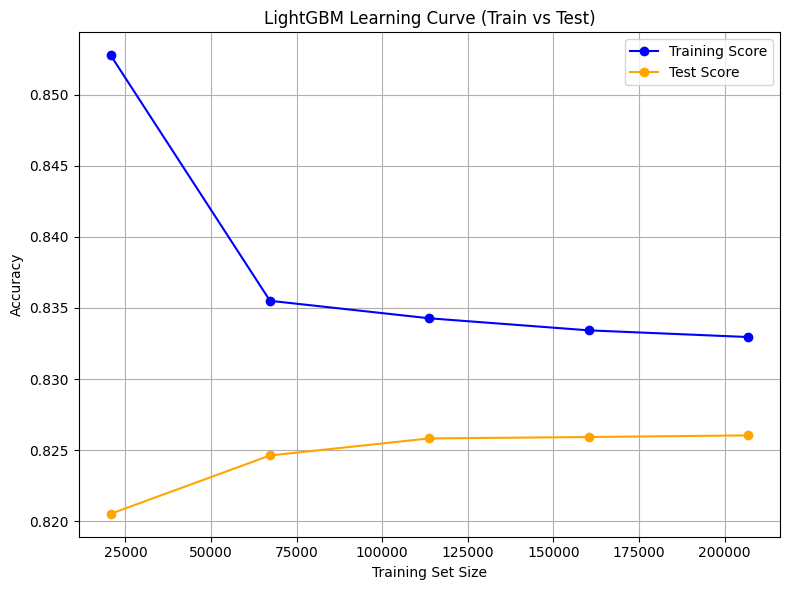

In [27]:
# Custom Learning Curve: Training score vs Test score
def plot_learning_curve_train_vs_test(estimator, X_train, y_train, X_test, y_test, title):
    train_sizes = np.linspace(0.1, 1.0, 5)
    train_scores = []
    test_scores = []

    for frac in train_sizes:
        size = int(frac * X_train.shape[0])
        X_partial = X_train[:size]
        y_partial = y_train[:size]
        model = estimator.__class__(**estimator.get_params())
        model.fit(X_partial, y_partial)
        train_score = model.score(X_partial, y_partial)
        test_score = model.score(X_test, y_test)
        train_scores.append(train_score)
        test_scores.append(test_score)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes * len(X_train), train_scores, 'o-', label='Training Score', color='blue')
    plt.plot(train_sizes * len(X_train), test_scores, 'o-', label='Test Score', color='orange')
    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot: Learning curve (Train vs Test)
plot_learning_curve_train_vs_test(lgbm, X_train.values, y_train_enc, X_test.values, y_test_enc, title="LightGBM Learning Curve (Train vs Test)")
